In [103]:
import matplotlib.pyplot as plt
import requests
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
#import datetime as dt
import pytz
from pprint import pprint


In [104]:
onecall = True  # 8 days
#onecall = False # 5 days

In [105]:

def get_location(city='paris',API_Key = 'edffd1bf975a74d5d10e58c5ac8be2d3'):
    base_url = 'http://api.openweathermap.org/data/2.5/weather?appid='+API_Key+'&q='+city
    current = requests.get(base_url).json()
    lat = current['coord']['lat']
    lon = current['coord']['lon']
    return lat,lon

def human_date(d):
   #return datetime.fromtimestamp(d, pytz.timezone('Europe/Paris')).strftime('%d/%m/%Y %H:%M:%S')
   return datetime.fromtimestamp(d, pytz.timezone('Europe/Paris')).strftime('%d/%m %H:%M')

def get_date(timestamp):
    return human_date(timestamp).split(' ')[0]

def get_time(timestamp):
    return human_date(timestamp).split(' ')[1]

def print_day(n):
    pprint(onecall_data['daily'][n])


# 8 days forecast


In [106]:

API_Key = 'edffd1bf975a74d5d10e58c5ac8be2d3'
lat, lon = get_location()
base_url = 'https://api.openweathermap.org/data/2.5/onecall?lat='+str(lat)+'&lon='+str(lon)+'&units=metric&exclude=hourly,minutely&appid='+API_Key
data_for = '8 days'
# request data
try:
    print('Requesting json data')
    onecall_data = requests.get(base_url).json()
    #print(onecall_data)
except:
    exit()

Requesting json data


In [107]:
# make dataframe and save
print('Creating dataframe: ', data_for)

df = onecall_data['daily']
l = len(df[0])


Creating dataframe:  8 days


In [108]:
_8days = pd.DataFrame.from_records(df)
print('Converting timestamp to human date')
for k in _8days.keys()[:5]:
    #print(k)
    if k=='dt':  # date for dt
        _8days[k] = _8days[k].apply(get_date)
    else:        # time for other columns
        _8days[k] = _8days[k].apply(get_time)            
_8days

Converting timestamp to human date


,dt,sunrise,sunset,moonrise,moonset,moon_phase,temp,feels_like,pressure,humidity,dew_point,wind_speed,wind_deg,wind_gust,weather,clouds,pop,uvi,rain
0,22/08,06:53,20:53,22:06,10:16,0.60,"{'day': 23.49, 'min': 15.83, 'max': 26.85, 'ni...","{'day': 22.81, 'night': 20.77, 'eve': 23.38, '...",1014,35,7.07,4.99,227,10.56,"[{'id': 800, 'main': 'Clear', 'description': '...",3,0,5.86,NaN
1,23/08,06:55,20:51,22:23,11:42,0.64,"{'day': 23.04, 'min': 16.95, 'max': 25.92, 'ni...","{'day': 23.1, 'night': 21.96, 'eve': 25.84, 'm...",1011,65,15.86,6.60,228,14.55,"[{'id': 803, 'main': 'Clouds', 'description': ...",82,0,5.31,NaN
2,24/08,06:56,20:49,22:43,13:08,0.68,"{'day': 27.17, 'min': 18.23, 'max': 27.95, 'ni...","{'day': 27.45, 'night': 18.12, 'eve': 21.6, 'm...",1008,48,15.21,5.78,224,11.32,"[{'id': 500, 'main': 'Rain', 'description': 'l...",26,1,5.87,2.59
3,25/08,06:58,20:47,23:09,14:34,0.72,"{'day': 20.75, 'min': 14.37, 'max': 23.2, 'nig...","{'day': 19.85, 'night': 18.57, 'eve': 21.52, '...",1023,37,5.63,4.17,280,8.46,"[{'id': 800, 'main': 'Clear', 'description': '...",0,0,5.20,NaN
4,26/08,06:59,20:45,23:42,15:56,0.75,"{'day': 24.27, 'min': 15.76, 'max': 25.28, 'ni...","{'day': 23.59, 'night': 20.39, 'eve': 23.21, '...",1023,32,6.37,2.71,58,6.25,"[{'id': 800, 'main': 'Clear', 'description': '...",0,0,5.07,NaN
5,27/08,07:00,20:43,01:00,17:11,0.79,"{'day': 25.84, 'min': 16.82, 'max': 27.02, 'ni...","{'day': 25.45, 'night': 24.19, 'eve': 25.4, 'm...",1018,37,10.01,4.03,80,5.81,"[{'id': 803, 'main': 'Clouds', 'description': ...",77,0,5.50,NaN
6,28/08,07:02,20:41,00:26,18:12,0.82,"{'day': 29.02, 'min': 20.37, 'max': 32.11, 'ni...","{'day': 28.72, 'night': 26.29, 'eve': 28.17, '...",1015,41,14.14,3.53,189,5.22,"[{'id': 804, 'main': 'Clouds', 'description': ...",100,0,6.00,NaN
7,29/08,07:03,20:39,01:24,18:59,0.85,"{'day': 33.4, 'min': 22.41, 'max': 34.83, 'nig...","{'day': 31.71, 'night': 28.37, 'eve': 31.29, '...",1014,24,10.05,3.59,169,5.58,"[{'id': 803, 'main': 'Clouds', 'description': ...",64,0,6.00,NaN


In [109]:
_8days.keys(), len(_8days.keys())

(Index(['dt', 'sunrise', 'sunset', 'moonrise', 'moonset', 'moon_phase', 'temp',
        'feels_like', 'pressure', 'humidity', 'dew_point', 'wind_speed',
        'wind_deg', 'wind_gust', 'weather', 'clouds', 'pop', 'uvi', 'rain'],
       dtype='object'),
 19)

In [110]:

print('Selecting columns')
# select multiple column ranges
focus = np.r_[:6, 8:14, 16:l]
focus_idx = _8days.keys()[focus]

status2 = pd.DataFrame(_8days[focus_idx])
demain = status2.loc[1]

demain

Selecting columns


dt            23/08
sunrise       06:55
sunset        20:51
moonrise      22:23
moonset       11:42
moon_phase     0.64
pressure       1011
humidity         65
dew_point     15.86
wind_speed      6.6
wind_deg        228
wind_gust     14.55
pop               0
uvi            5.31
Name: 1, dtype: object

In [111]:
focus

array([ 0,  1,  2,  3,  4,  5,  8,  9, 10, 11, 12, 13, 16, 17])

In [112]:
# zip and save
print('Save to CSV')
compression_opts = dict(method='zip', archive_name='demain.csv')
demain.to_csv('demain.zip', index=False, compression=compression_opts)
# no compression 
demain.to_csv('demain.csv')
#pprint(onecall_data)
print(_8days.iloc[0])  # today


Save to CSV
dt                                                        22/08
sunrise                                                   06:53
sunset                                                    20:53
moonrise                                                  22:06
moonset                                                   10:16
moon_phase                                                  0.6
temp          {'day': 23.49, 'min': 15.83, 'max': 26.85, 'ni...
feels_like    {'day': 22.81, 'night': 20.77, 'eve': 23.38, '...
pressure                                                   1014
humidity                                                     35
dew_point                                                  7.07
wind_speed                                                 4.99
wind_deg                                                    227
wind_gust                                                 10.56
weather       [{'id': 800, 'main': 'Clear', 'description': '...
clouds                      

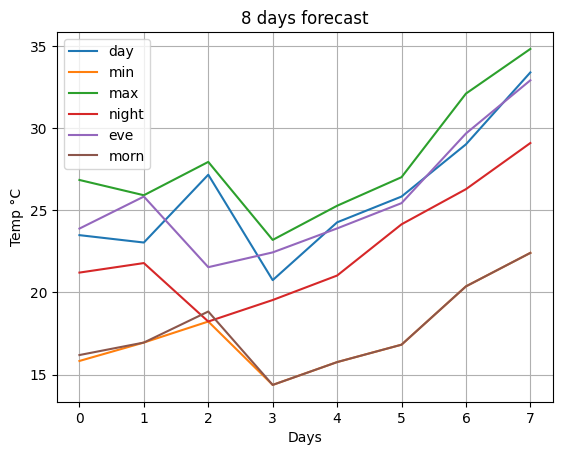

In [113]:
# plot temperature
l = []
for i in range(0,8):
    l.append(_8days.iloc[i].temp)

df = pd.DataFrame(l)
df.plot()
plt.title('8 days forecast')
plt.ylabel('Temp °C')
plt.xlabel('Days')
plt.grid()
plt.show()

   
# 5 days forecast


In [114]:

API_Key = '56040ff66d50184c81a4df3a770657e3'
#API_Key = '42a2df3beefb73f7161413a3f5a53f2a'
lat, lon = get_location(API_Key=API_Key)
base_url = 'https://api.openweathermap.org/data/2.5/forecast?lat='+str(lat)+'&lon='+str(lon)+'&units=metric&exclude=hourly,minutely&appid='+API_Key
data_for = '5 days'
try:
    print('Requesting json data')
    forecast = requests.get(base_url).json()
    print(forecast)
except:
    exit()


Requesting json data
{'cod': '200', 'message': 0, 'cnt': 40, 'list': [{'dt': 1724360400, 'main': {'temp': 21.04, 'feels_like': 20.66, 'temp_min': 21.04, 'temp_max': 21.92, 'pressure': 1011, 'sea_level': 1011, 'grnd_level': 1002, 'humidity': 56, 'temp_kf': -0.88}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'clouds': {'all': 0}, 'wind': {'speed': 3.46, 'deg': 223, 'gust': 10.56}, 'visibility': 10000, 'pop': 0, 'sys': {'pod': 'n'}, 'dt_txt': '2024-08-22 21:00:00'}, {'dt': 1724371200, 'main': {'temp': 20.57, 'feels_like': 20.17, 'temp_min': 19.62, 'temp_max': 20.57, 'pressure': 1011, 'sea_level': 1011, 'grnd_level': 1001, 'humidity': 57, 'temp_kf': 0.95}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'clouds': {'all': 33}, 'wind': {'speed': 3.69, 'deg': 229, 'gust': 11.32}, 'visibility': 10000, 'pop': 0, 'sys': {'pod': 'n'}, 'dt_txt': '2024-08-23 00:00:00'}, {'dt': 1724382000, 'main': {'temp': 18.73,

In [115]:
# make dataframe and save
print('Creating dataframe: ', data_for)

df = forecast['list']
_5days = pd.DataFrame.from_records(df)
print(_5days.iloc[0])


Creating dataframe:  5 days
dt                                                   1724360400
main          {'temp': 21.04, 'feels_like': 20.66, 'temp_min...
weather       [{'id': 800, 'main': 'Clear', 'description': '...
clouds                                               {'all': 0}
wind                 {'speed': 3.46, 'deg': 223, 'gust': 10.56}
visibility                                                10000
pop                                                         0.0
sys                                                {'pod': 'n'}
dt_txt                                      2024-08-22 21:00:00
rain                                                        NaN
Name: 0, dtype: object


In [116]:
_5days.keys()


Index(['dt', 'main', 'weather', 'clouds', 'wind', 'visibility', 'pop', 'sys',
       'dt_txt', 'rain'],
      dtype='object')

In [117]:
_5days['date'] = _5days['dt'].apply(get_date)
_5days['human_date'] = _5days['dt'].apply(human_date)
_5days['time'] = _5days['dt'].apply(get_time)
main = pd.DataFrame.from_records(_5days['main'])
_5days = pd.concat([_5days,main],axis=1)

print(_5days[['human_date', 'time', 'temp_max','temp_min']])


     human_date   time  temp_max  temp_min
0   22/08 23:00  23:00     21.92     21.04
1   23/08 02:00  02:00     20.57     19.62
2   23/08 05:00  05:00     18.73     17.58
3   23/08 08:00  08:00     17.43     17.43
4   23/08 11:00  11:00     22.50     22.50
5   23/08 14:00  14:00     25.40     25.40
6   23/08 17:00  17:00     25.57     25.57
7   23/08 20:00  20:00     24.82     24.82
8   23/08 23:00  23:00     21.79     21.79
9   24/08 02:00  02:00     20.93     20.93
10  24/08 05:00  05:00     19.54     19.54
11  24/08 08:00  08:00     19.07     19.07
12  24/08 11:00  11:00     24.30     24.30
13  24/08 14:00  14:00     27.91     27.91
14  24/08 17:00  17:00     25.60     25.60
15  24/08 20:00  20:00     20.60     20.60
16  24/08 23:00  23:00     18.23     18.23
17  25/08 02:00  02:00     16.55     16.55
18  25/08 05:00  05:00     15.10     15.10
19  25/08 08:00  08:00     14.45     14.45
20  25/08 11:00  11:00     18.19     18.19
21  25/08 14:00  14:00     21.75     21.75
22  25/08 1

In [118]:
_5days['human_date']

0     22/08 23:00
1     23/08 02:00
2     23/08 05:00
3     23/08 08:00
4     23/08 11:00
5     23/08 14:00
6     23/08 17:00
7     23/08 20:00
8     23/08 23:00
9     24/08 02:00
10    24/08 05:00
11    24/08 08:00
12    24/08 11:00
13    24/08 14:00
14    24/08 17:00
15    24/08 20:00
16    24/08 23:00
17    25/08 02:00
18    25/08 05:00
19    25/08 08:00
20    25/08 11:00
21    25/08 14:00
22    25/08 17:00
23    25/08 20:00
24    25/08 23:00
25    26/08 02:00
26    26/08 05:00
27    26/08 08:00
28    26/08 11:00
29    26/08 14:00
30    26/08 17:00
31    26/08 20:00
32    26/08 23:00
33    27/08 02:00
34    27/08 05:00
35    27/08 08:00
36    27/08 11:00
37    27/08 14:00
38    27/08 17:00
39    27/08 20:00
Name: human_date, dtype: object

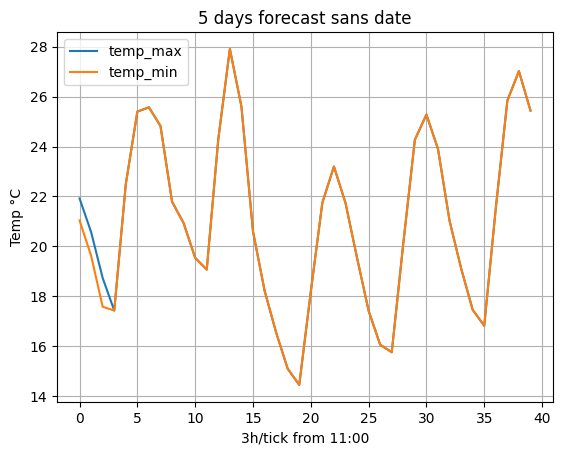

In [119]:
# plot
_5days[['temp_max','temp_min']].plot()
plt.title('5 days forecast sans date')
plt.ylabel('Temp °C')
plt.xlabel('3h/tick from 11:00')
plt.grid()
plt.show()
    

In [120]:
# pip install seaborn
import seaborn as sns

[Text(0.5, 0, 'day&hour'),
 Text(0, 0.5, 'temp °C'),
 Text(0.5, 1.0, '5 days forecast')]

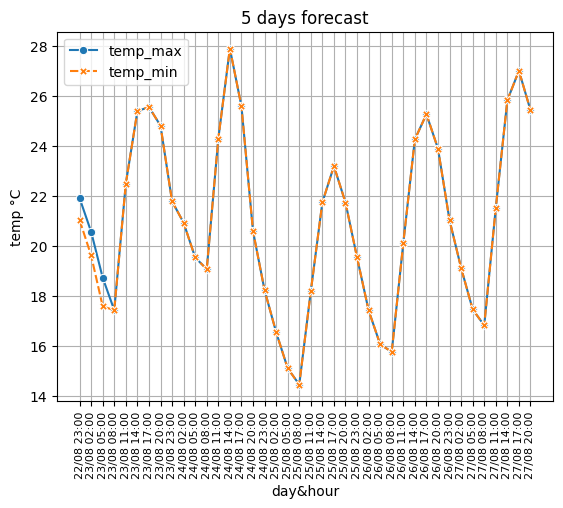

In [121]:
# plot 5 days temp for every 3 hours tick
df1 = pd.DataFrame(_5days[['human_date','temp_max','temp_min']]) 
df1 = df1.set_index('human_date')
df1
ax= sns.lineplot(data=df1, markers= True)
plt.xticks(rotation=90, fontsize=8)
plt.grid()
ax.set(xlabel='day&hour', ylabel='temp °C', title='5 days forecast') 

[Text(0.5, 0, 'time (hours)'),
 Text(0, 0.5, 'temp °C'),
 Text(0.5, 1.0, '5 days forecast')]

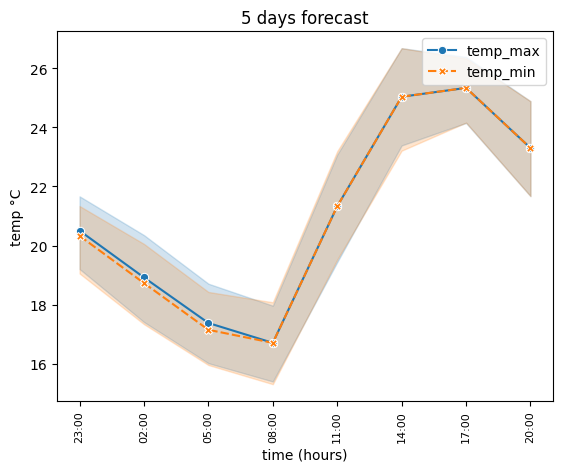

In [122]:
# index on hours get 5 days hour window variation
df2 = pd.DataFrame(_5days[['time','temp_max','temp_min']]) 
df2
df2 = df2.set_index('time')
df2
ax= sns.lineplot(data=df2, markers= True)
plt.xticks(rotation=90, fontsize=8)
ax.set(xlabel='time (hours)', ylabel='temp °C', title='5 days forecast') 